In [1]:
import sys
sys.path.append("/users/alikaan.gueven/SDV-ML/ParticleTransformer/SDV-ML")
import ParT_modified as ParT
import torch

In [2]:
model = torch.load("/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-397best_valloss_epoch.pt", map_location=torch.device('cpu'))

In [6]:
# overall Frobenius norm of each parameter
for name, p in model.named_parameters():
    print(name, p.data.norm().item())


cls_token 0.2785404859682653
embed.input_bn.weight 3.3403754941291677
embed.input_bn.bias 0.13683921350132702
embed.embed.0.weight 3.377079917856446
embed.embed.0.bias 0.13777299914283755
embed.embed.1.weight 7.3688404053757095
embed.embed.1.bias 1.5989501677952027
embed.embed.3.weight 11.504201192262506
embed.embed.3.bias 0.3932316840483712
embed.embed.4.weight 17.286564279097508
embed.embed.4.bias 1.3985058816020948
embed.embed.6.weight 22.85106924895067
embed.embed.6.bias 0.9702401785405418
embed.embed.7.weight 12.515496438462597
embed.embed.7.bias 0.4399966340358919
pair_embed.embed.0.weight 2.009481831474529
pair_embed.embed.0.bias 1.235549828381562e-10
pair_embed.embed.1.weight 4.825894058406464
pair_embed.embed.1.bias 2.364050708509402
pair_embed.embed.2.weight 8.061666285975999
pair_embed.embed.2.bias 0.40134265617952714
pair_embed.embed.4.weight 5.6003100337782445
pair_embed.embed.4.bias 0.613234800460765
pair_embed.embed.5.weight 7.940192003949112
pair_embed.embed.5.bias 0.42

Total params        : 2,276,366
  Trainable         : 2,276,366
    • weights       : 1,759,482
    • biases        : 20,036
  Non-trainable     : 0


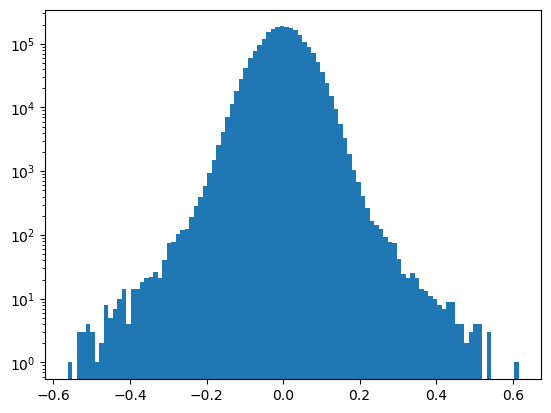

In [7]:
# histograms of the largest weights
import matplotlib.pyplot as plt
w = torch.cat([p.data.flatten() for p in model.parameters()
               if p.dim() > 1])        # skip biases
plt.hist(w.cpu(), bins=100, log=True); plt.show()

/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_0.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_1.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_2.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_3.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_4.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_5.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_6.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_7.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_8.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_9.pt


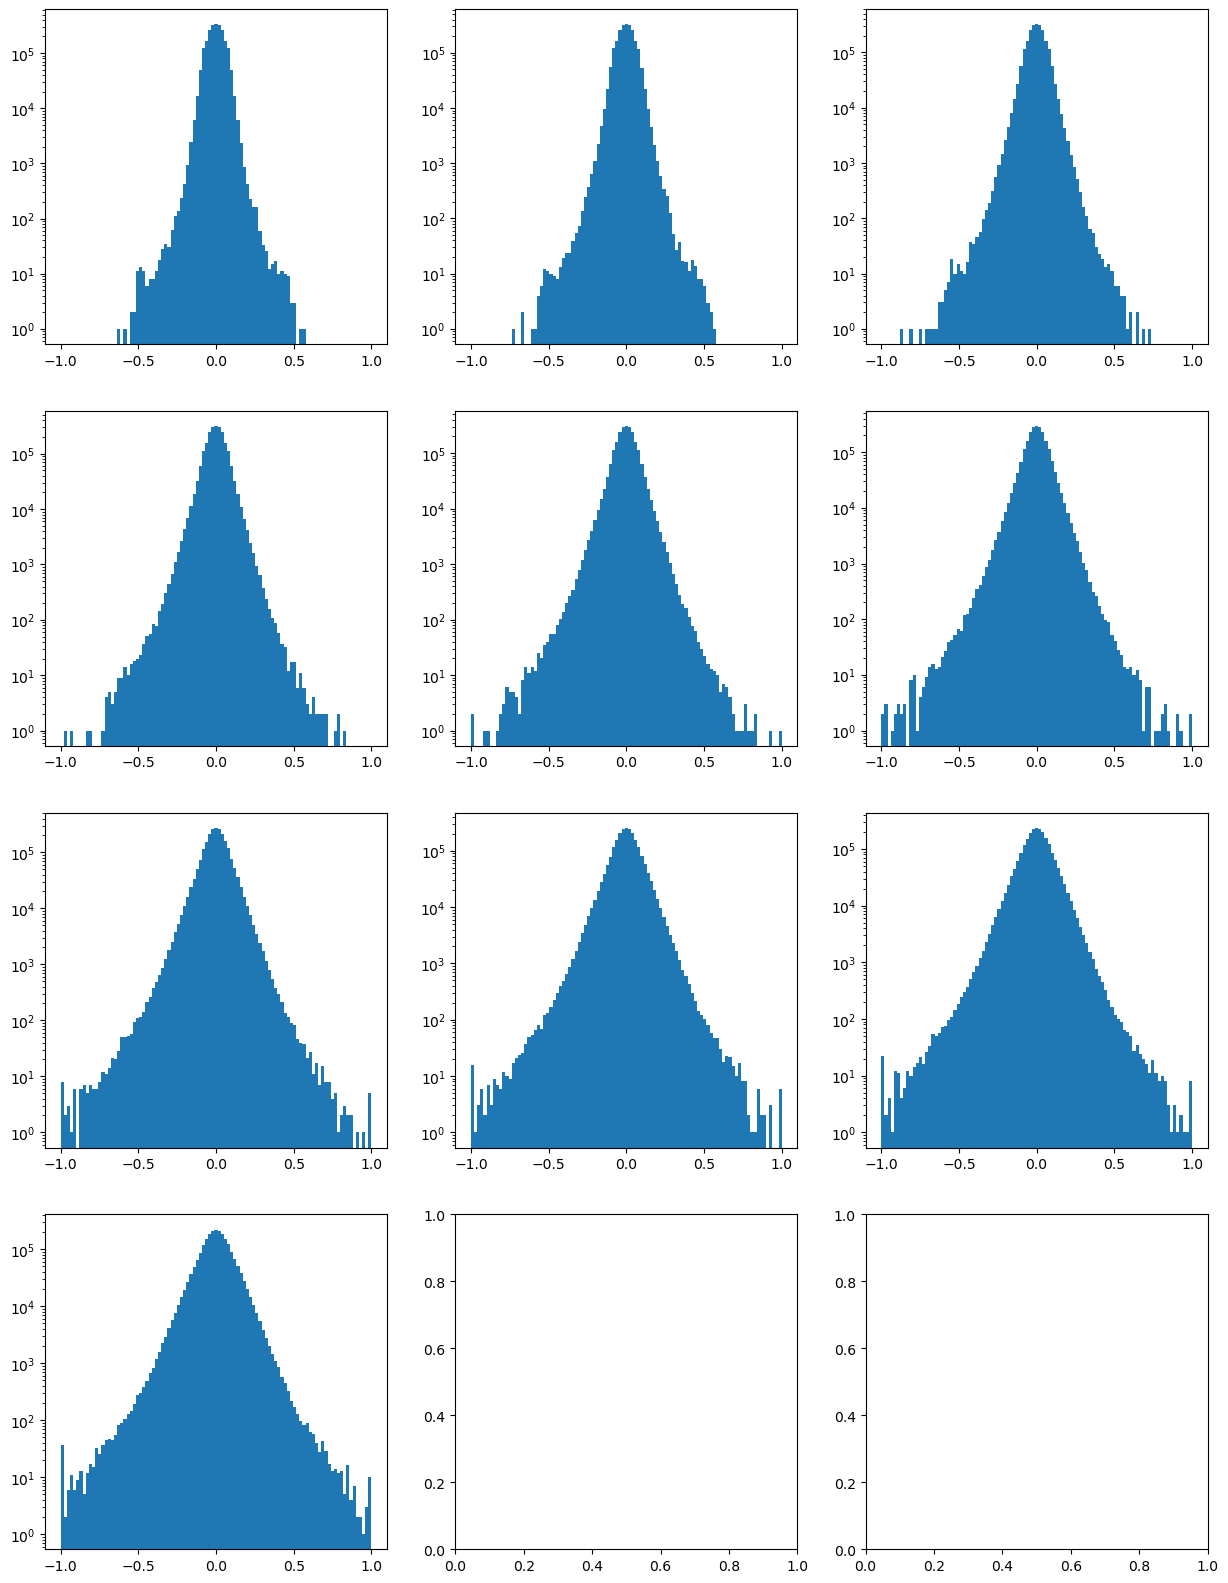

In [28]:
# model = torch.load("/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-397best_valloss_epoch.pt", map_location=torch.device('cpu'))


import os 
import glob
import math
import numpy as np
import matplotlib.pyplot as plt


sys.modules['ParT'] = ParT

modelnames = glob.glob("/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_*") # 397
N = len(modelnames)
Ncols = 3
Nrows = math.ceil(N / Ncols)
fig, ax = plt.subplots(Nrows, Ncols, figsize=(15, 5 * Nrows))
ax = ax.flatten()


bins = np.linspace(-1.0, 1.0, 100)

for i, modelname in enumerate(modelnames):
    print(modelname)
    model = torch.load(modelname, map_location=torch.device('cpu'))
    w = torch.cat([p.data.flatten() for p in model.parameters()
               if p.dim() > 1])        # skip biases
    w = w.cpu().numpy()
    clipped_w = np.clip(w, bins[0], bins[-1])
    ax[i].hist(clipped_w, bins=bins, log=True)

/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_0.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_1.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_2.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_3.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_4.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_5.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_6.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_7.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_8.pt
/groups/hephy/cms/alikaan.gueven/ParT/models/vtx_PART-338_epoch_9.pt


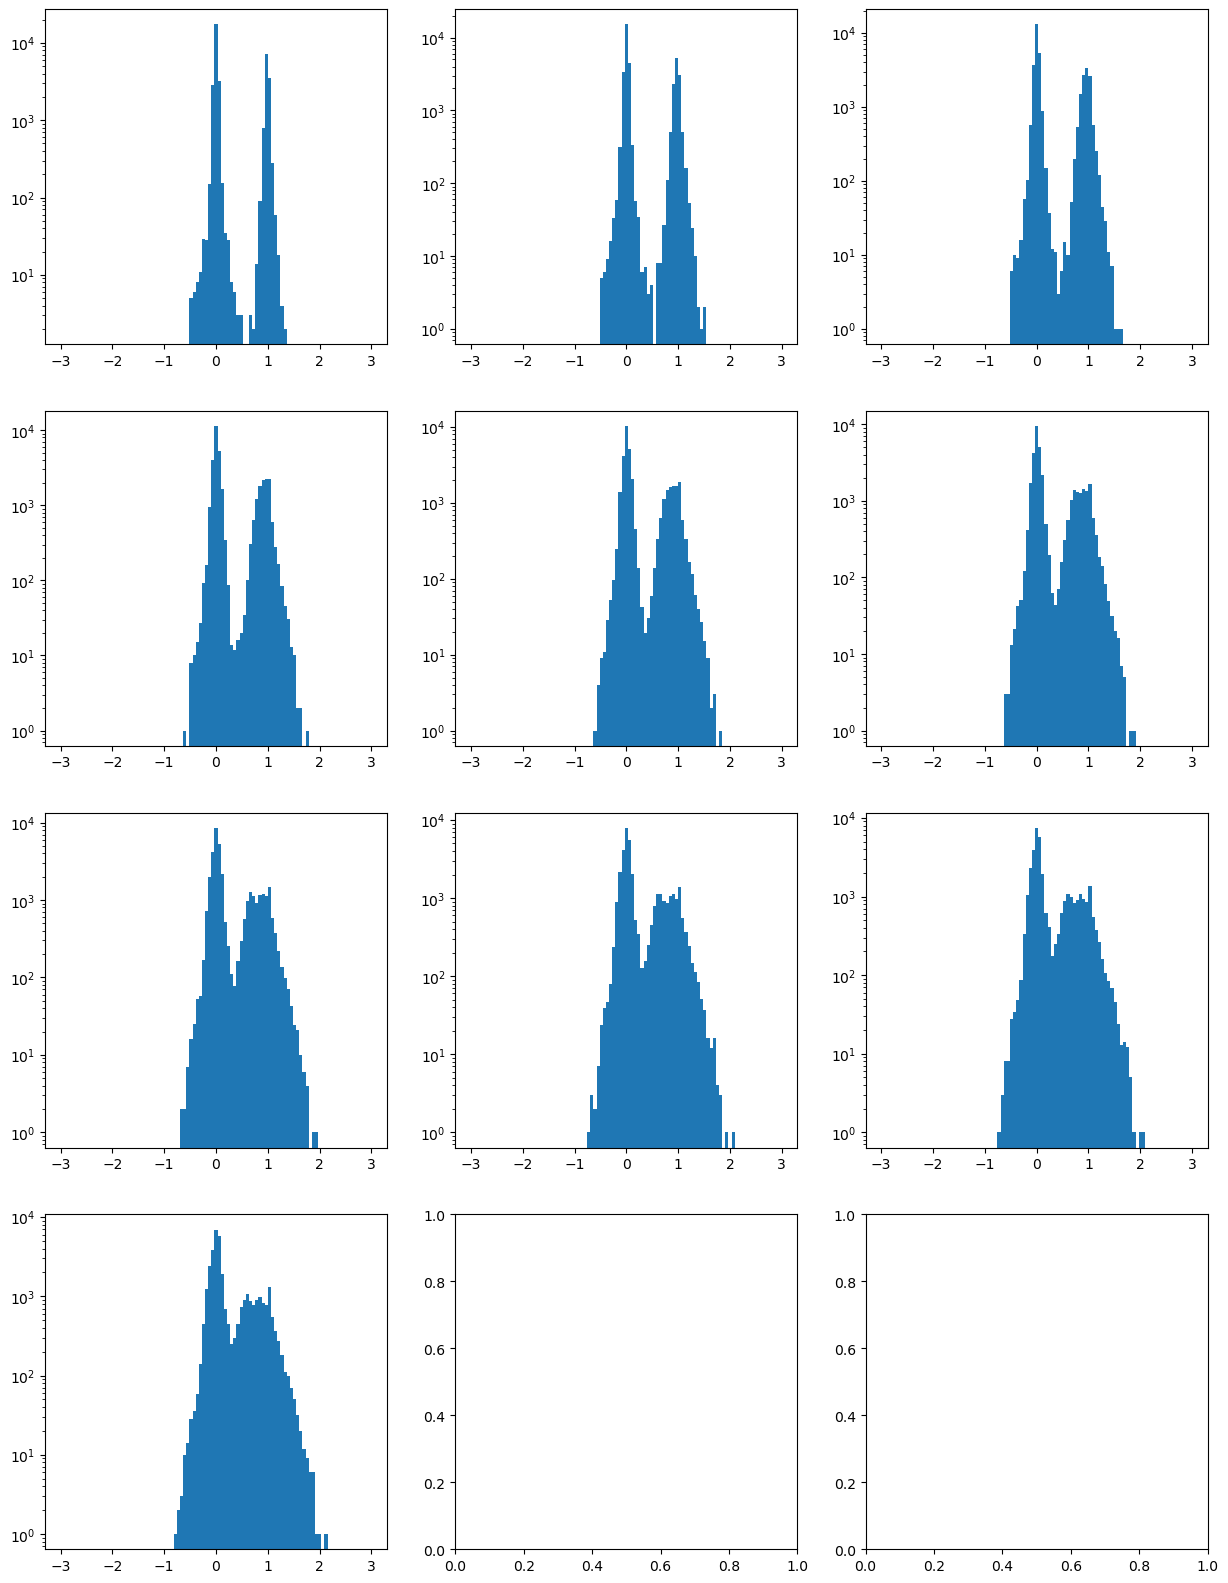

In [29]:
fig, ax = plt.subplots(Nrows, Ncols, figsize=(15, 5 * Nrows))
ax = ax.flatten()


bins = np.linspace(-3.0, 3.0, 100)

for i, modelname in enumerate(modelnames):
    print(modelname)
    model = torch.load(modelname, map_location=torch.device('cpu'))
    w = torch.cat([p.data.flatten() for p in model.parameters()
               if p.dim() <= 1])        # skip biases
    w = w.cpu().numpy()
    clipped_w = np.clip(w, bins[0], bins[-1])
    ax[i].hist(clipped_w, bins=bins, log=True)

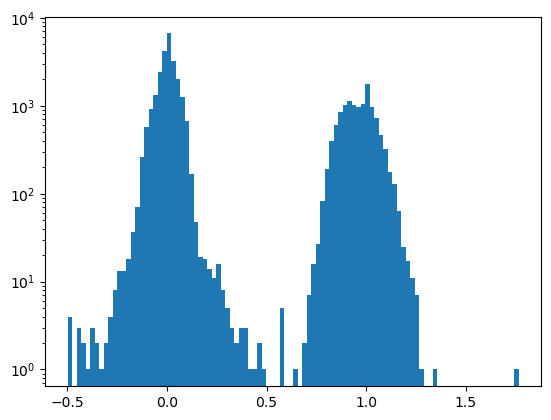

In [ ]:
# histograms of biasses
import matplotlib.pyplot as plt
w = torch.cat([p.data.flatten() for p in model.parameters()
               if p.dim() <= 1])        # skip biases
plt.hist(w.cpu(), bins=100, log=True); plt.show()

In [5]:
# how much any weight changed from initialisation
delta = [(name, (p.data - p0).abs().max().item())
         for (name, p), p0 in zip(model.named_parameters(), initial_params)]

NameError: name 'initial_params' is not defined